# Expertise in T6

## The tl;dr

*Regardless of your race or other gear you can get rid of Shattrath Leggings/Clefthoof Hide Leggings as soon as you get any of the following*:

- Leggings of Divine Retribution
- Bow-stitched Leggings
- Legguards of Endless Rage

(For Endless Rage, although this is barely an upgrade, it is an upgrade especially if you can now use Glyph of the Outcast instead of Glyph of Ferocity as your leg enchant.)

Bow-stitched are your BiS on high-armor bosses, Divine Retribution are your BiS on low-armor bosses.

If you want to understand this more fully, you can read on.

---
## Expertise and Expertise Rating

Each point of Expertise you have reduces your 6.5% chance to be dodged on a boss-lvl mob by 0.25%. Each point of Expertise rating on gear converts to Expertise at a 3.9:1 ratio.

*Expertise rounds down to the nearest integer* - as an example with the following gear:
- Shattrath Leggings (22 rating)
- Shapeshifters Signet (20 rating)
- Gloves of the Searing Grip (18 rating)

In [6]:
import math

def print_expertise_info(rating, human=False):
    """Print info on a player's expertise and dodge chance."""
    expertise_unrounded = rating/3.9
    expertise = math.floor(expertise_unrounded)  # rounds down to nearest integer
    print(f'Total rating = {rating}')
    print(f'Unrounded Expertise = {expertise_unrounded}')
    print(f'Expertise gained = {expertise}')
    if human:
        expertise += 5
    print(f'Chance to be dodged = {6.5 - expertise*0.25}%')

# shat (22 rating) + shapeshifters (20) + searing grip (18)
my_rating = 22 + 20 + 18
print_expertise_info(my_rating)

Total rating = 60
Unrounded Expertise = 15.384615384615385
Expertise gained = 15
Chance to be dodged = 2.75%


This tells us that the Expertise Rating on a piece of gear has different value breakpoints depending on the rest of your gear.

As an example, let's consider the value of getting Shoulderpads of the Stranger with two different gearsets.

Case 1:
- player has searing grip/shapeshifters/shat legs

Case 2:
- player has searing grip/shapeshifters/shat legs/100Ds

In [21]:
# searing grip + shapeshifters + shat
print('-- Case 1a: searing grip/shapeshifters/shat legs')
print_expertise_info(18+20+22)

print()

# searing grip + shapeshifters + shat + strangers
print('-- Case 1b: searing grip/shapeshifters/shat legs/strangers')
print_expertise_info(18+20+22+10)

print()
print('-'*80)

# searing grip + shapeshifters + shat + 100D
print('-- Case 2a: searing grip/shapeshifters/shat legs/100Ds')
print_expertise_info(18+20+22+25)
print()
print('-- Case 2b: searing grip/shapeshifters/shat legs/100Ds/strangers')
print_expertise_info(18+20+22+25+10)


-- Case 1a: searing grip/shapeshifters/shat legs
Total rating = 60
Unrounded Expertise = 15.384615384615385
Expertise gained = 15
Chance to be dodged = 2.75%

-- Case 1b: searing grip/shapeshifters/shat legs/strangers
Total rating = 70
Unrounded Expertise = 17.94871794871795
Expertise gained = 17
Chance to be dodged = 2.25%

--------------------------------------------------------------------------------
-- Case 2a: searing grip/shapeshifters/shat legs/100Ds
Total rating = 85
Unrounded Expertise = 21.794871794871796
Expertise gained = 21
Chance to be dodged = 1.25%

-- Case 2b: searing grip/shapeshifters/shat legs/100Ds/strangers
Total rating = 95
Unrounded Expertise = 24.35897435897436
Expertise gained = 24
Chance to be dodged = 0.5%


We can see in Case 1, we gain 2 Expertise because of how the rating of Strangers rounds down.

In Case 2, we gain 3 Expertise because it rounds down less due to breakpoints.

Thankfully this is easy enough to work out, you just add up the rating, divide by 3.9, and round down to the nearest integer.

---
## Expertise and increasing returns

It is to some extent true that *expertise for a ret has increasing returns*.

To see why, we consider the damage chains that are rolled out in the two possible chains for a windfury twist:

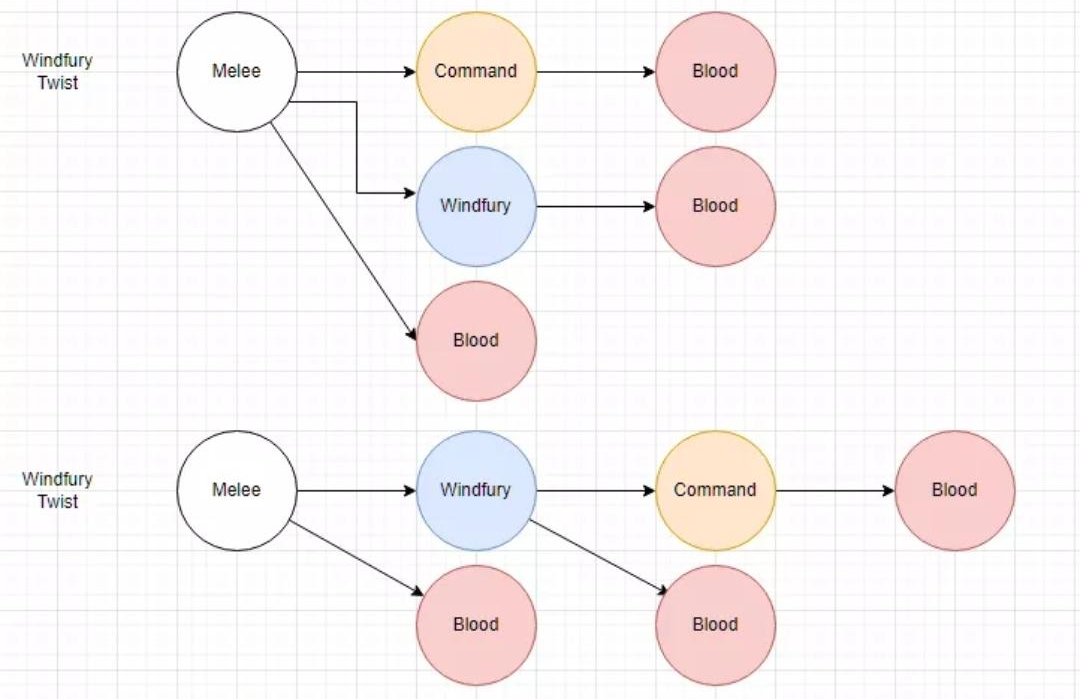

At every arrow on the graph, a dodge check is made. If it is failed, *every part of the damage chain after the fail is also negated*.

When we project the damage i.e. average it out, this looks like the following (don't be scared by how awful it looks):

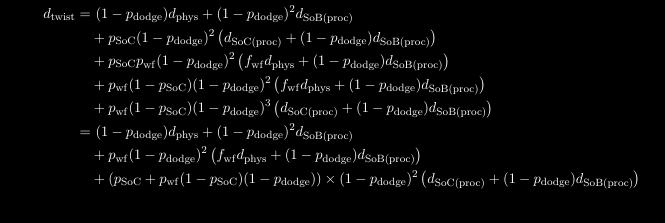

The key thing to take away from this equation is the presence of multiple terms that look like (1 - p_dodge)^N where N is between 1-4.

For the last SoB proc in the second windfury twist chain (which is contained in the last line of the equation), the chance of the attack going through scales with (1-p_dodge)^4.

Let's see how that looks at given Expertise points.

In [7]:
# No Expertise
print('Expertise = 0:')
dodge_chance = 0.065
scale_factor = (1 - dodge_chance)**4
print(f'Scaling factor = {scale_factor}')
# Expertise = 10
print('-'*50)
print('Expertise = 10:')
dodge_chance = 0.065 - 10*0.0025
scale_factor_10 = (1 - dodge_chance)**4
print(f'Scaling factor = {scale_factor_10}')
# Expertise = 20
print('-'*50)
print('Expertise = 20:')
dodge_chance = 0.065 - 20*0.0025
scale_factor_20 = (1 - dodge_chance)**4
print(f'Scaling factor = {scale_factor_20}')
print('-'*100)
print(f'benefit going from 0 to 10 Expertise = {scale_factor_10 - scale_factor}')
print(f'benefit going from 10 to 20 Expertise = {scale_factor_20 - scale_factor_10}')

Expertise = 0:
Scaling factor = 0.7642693506250001
--------------------------------------------------
Expertise = 10:
Scaling factor = 0.8493465599999999
--------------------------------------------------
Expertise = 20:
Scaling factor = 0.941336550625
----------------------------------------------------------------------------------------------------
benefit going from 0 to 10 Expertise = 0.08507720937499974
benefit going from 10 to 20 Expertise = 0.09198999062500013


As you can see, the difference in going from zero to 10 Expertise improves the scale factor by less than going from 10 to 20 Expertise. Let's visualise this curve for 2, 3, and 4 dodge rolls, which covers a huge fraction of a ret's damage.

Text(0.5, 1.0, 'Expertise damage scaling at 2 dodge rolls')

Text(0, 0.5, 'Damage scaling')

Text(0.5, 0, 'Expertise')

Text(0.5, 1.0, 'Expertise damage scaling at 3 dodge rolls')

Text(0, 0.5, 'Damage scaling')

Text(0.5, 0, 'Expertise')

Text(0.5, 1.0, 'Expertise damage scaling at 4 dodge rolls')

Text(0, 0.5, 'Damage scaling')

Text(0.5, 0, 'Expertise')

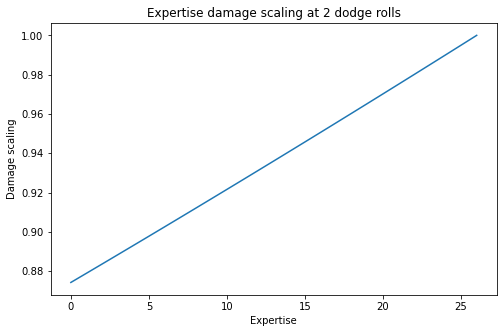

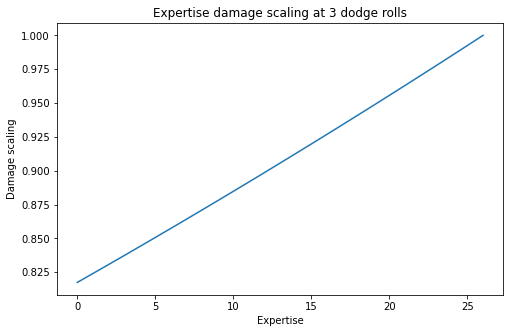

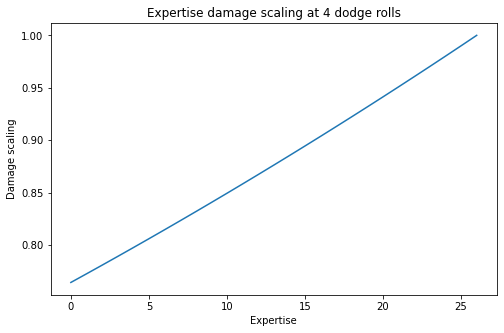

In [21]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

expertise_array = np.linspace(0, 26, num=27)

for n_rolls in [2,3,4]:
    damage_factors = [(1 - (0.065 - exp * 0.0025) )**n_rolls for exp in expertise_array]
    
    figure = Figure()
    canvas = FigureCanvas(figure)
    fig = plt.figure(figsize = (8, 5))
    # Create the plot
    plt.plot(expertise_array, damage_factors);
    plt.title(f'Expertise damage scaling at {n_rolls} dodge rolls');
    plt.ylabel('Damage scaling');
    plt.xlabel('Expertise');


You can see that as we add more and more rolls, the graph displays increasing diminishing returns.

HOWEVER: the effect is very marginal. Increasing returns only become strongly visible at 4 dodge rolls, and in PvE the only time you have to worry about 4 dodge rolls is for the final SoB hit in about half of your windfury twists (in the other half this SoB proc only needs to survive 3 dodge rolls).

## What does this mean for gearing?

Because the increasing returns on Expertise are incredibly marginal, to a rough approximation:
- your other expertise doesn't matter for increasing returns on expertise
- your other gear *does* matter for determining how much Expertise your rating will round down to.

## But Swedge, when can I take off my Shat legs?

> Well, if you get Divine Retribution or Bow-stitched, immediately.

The damage per second you output is a function of how hard you hit and also how often you get dodged.

Obviously getting rid of some expertise by ditching Shat legs means you will get dodged a bit more - but it's more than made up by the extra stats on our two T6 BiS options.

You can sim this out yourself, but even in the case where you have high amounts of Expertise and Shat Legs are giving you 6 Expertise, Bow-stitched/Divine Retri are still better by over 10dps.

In the case where it gives you 5 Expertise, that difference is more like 30dps.

So rejoice, you finally get to ditch your shitty yoga pants if you have them, and if you don't have them then you're not missing out any more.